DEMO NOTEBOOK FOR TESTING MODULES

In [6]:
from eda import sum, plot_distributions, cor_heatmap, scatter_plot
from loader import load
from algo import svr
from algo_rfm import random_forest_model, tune_random_forest

In [2]:
# Load data
data = load("data/forestfires.csv")

Data load completed!


In [3]:
from preprocessing import preprocess, handle_missing_values, scale_features
from loader import load

# Load data
data = load("data/forestfires.csv")

# Preprocess categorical variables
data = preprocess(data)

# Handle missing values
data = handle_missing_values(data)

# Scale specific features
features_to_scale = ['temp', 'RH', 'wind', 'rain', 'area']
data = scale_features(data, features_to_scale)

# Display processed data
print(data.head())


Data load completed!
   X  Y  month  day  FFMC   DMC     DC  ISI      temp        RH      wind  \
0  7  5      3    5  86.2  26.2   94.3  5.1  0.192926  0.423529  0.700000   
1  7  4     10    2  90.6  35.4  669.1  6.7  0.508039  0.211765  0.055556   
2  7  4     10    6  90.6  43.7  686.9  6.7  0.398714  0.211765  0.100000   
3  8  6      3    5  91.7  33.3   77.5  9.0  0.196141  0.964706  0.400000   
4  8  6      3    7  89.3  51.3  102.2  9.6  0.295820  0.988235  0.155556   

      rain  area  
0  0.00000   0.0  
1  0.00000   0.0  
2  0.00000   0.0  
3  0.03125   0.0  
4  0.00000   0.0  


Data load completed!


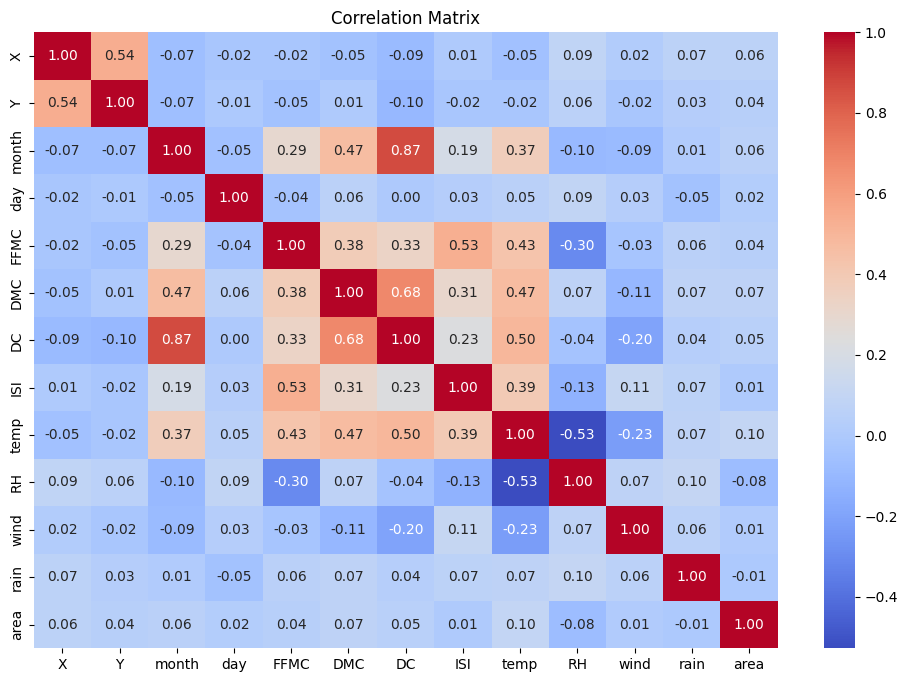

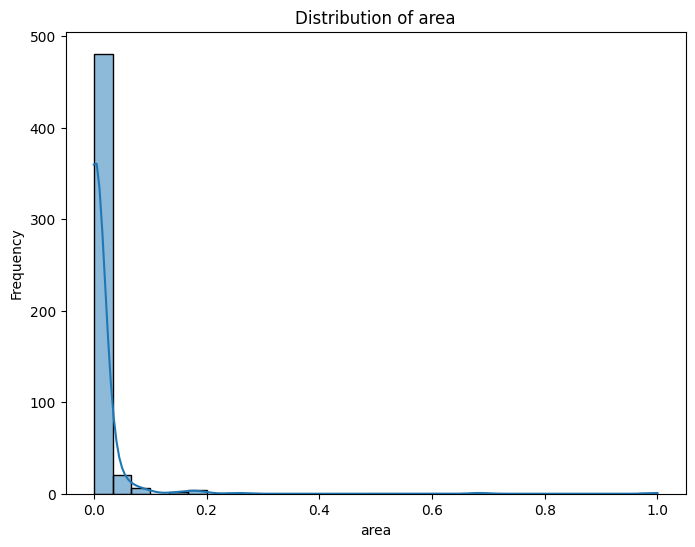

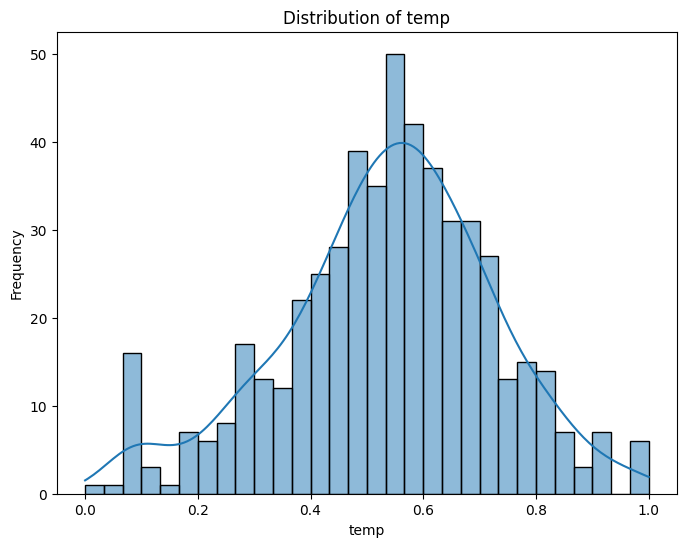

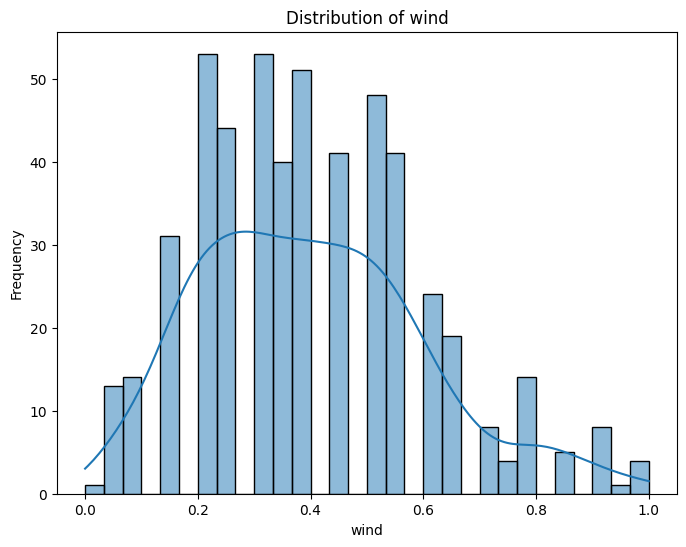

Wind has this weird pattern of higher bars no bars etc. 
 I guess this is because wind tends to be 
registered as 5 or 6 and less likely as 5.5


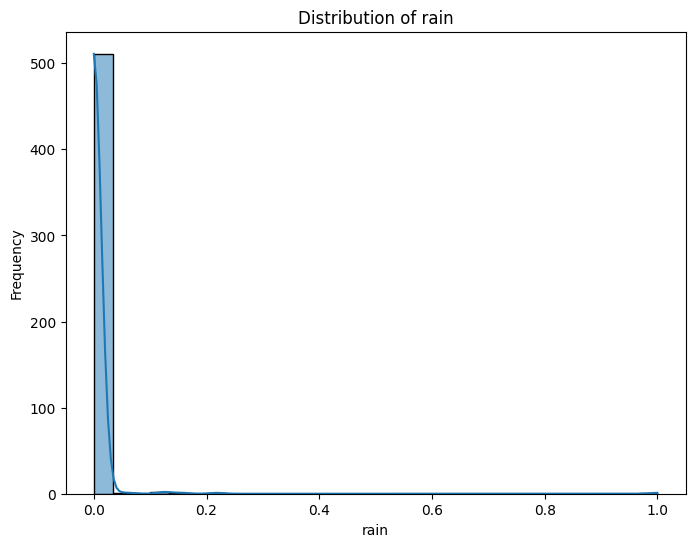

In [4]:
from preprocessing import preprocess, handle_missing_values, scale_features
from eda import cor_heatmap, plot_distributions
from loader import load

# Load data
data = load("data/forestfires.csv")

# Preprocess
data = preprocess(data)
data = handle_missing_values(data)

#If you un-# this the data shown in graphs will be normalized for range [0,1]
features_to_scale = ['temp', 'RH', 'wind', 'rain', 'area']
data = scale_features(data, features_to_scale)

# Analyze
cor_heatmap(data)
plot_distributions(data, 'area')
plot_distributions(data,'temp')
plot_distributions(data,'wind')
print("Wind has this weird pattern of higher bars no bars etc. \n I guess this is because wind tends to be \nregistered as 5 or 6 and less likely as 5.5")
plot_distributions(data,'rain')


In [5]:
# SVR!
results = svr(data)
print(f"MSE: {results['mse']:.2f}")
print(f"R2 Score: {results['r2']:.2f}")

MSE: 0.01
R2 Score: -0.02


Okay so this SVM performed incredibly bad haha. Probably an issue with scaling it so next I will use a Random Forest classifier

In [7]:
# Run Random Forest
results = random_forest_model(data)
print(f"Random Forest MSE: {results['mse']:.2f}")
print(f"Random Forest R2 Score: {results['r2']:.2f}")

# Optional: Run Hyperparameter Tuning
tuned_results = tune_random_forest(data)
print(f"Tuned Random Forest MSE: {tuned_results['mse']:.2f}")
print(f"Tuned Random Forest R2 Score: {tuned_results['r2']:.2f}")

Random Forest MSE: 0.01
Random Forest R2 Score: -0.04
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2

Random forest classifier also performs poorly on this data. Next I will try a K-means cluster. 